### 为什么要做数据归一化?

以KNN算法为例，目前有两个肿瘤病人样本，每个样本有两个特征：肿瘤大小(cm)和发现时间(天)
样本1：1cm，200天  样本2：5cm，100天
计算两个样本间的距离时:会发现时间起了主导作用。
可以发现如果不对数据进行一些基本处理，直接计算两个样本的距离时，可能有偏差。
故要做数据归一化。即将所有的数据映射到同一尺度。常见归一化方法有：
1. 最值归一化：把所有数据映射到0-1之间，适用于分布有明显边界的情况，缺点是受outlier（没有明显边界）影响比较大。
2. 均值方差归一化：把所有的数据归一到均值为0，方差为1的分布中。适用于没有明显边界，可能存在极端数据值的情况。有明显边界使用该归一化方法也是有效的。**推荐**

### 最值归一化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.randint(0, 100, 100) # 生成100个范围在[0,100)的随机数

In [3]:
x

array([12,  7, 41, 40, 40,  9, 59, 25,  1, 51, 30, 97, 84, 47, 50, 81,  9,
       36, 41, 83, 45, 11, 69, 13, 63, 54, 92, 25, 10, 51,  4, 31, 80, 75,
       78, 70, 32, 30, 75, 17, 97, 96, 16, 57, 94, 48, 64, 44, 81, 80,  7,
       46, 31,  3, 98, 27, 87, 77, 60, 43, 65, 82,  0, 90, 30, 98, 81, 16,
       48, 49, 24, 83, 73, 96, 93, 77, 12,  3,  8,  2, 33, 70, 36,  8, 61,
       19, 10, 53,  8,  8, 35, 12, 22, 81, 28, 70, 68, 36, 53, 90])

In [4]:
(x - np.min(x)) / (np.max(x) - np.min(x)) # 进行最值归一化

array([0.12244898, 0.07142857, 0.41836735, 0.40816327, 0.40816327,
       0.09183673, 0.60204082, 0.25510204, 0.01020408, 0.52040816,
       0.30612245, 0.98979592, 0.85714286, 0.47959184, 0.51020408,
       0.82653061, 0.09183673, 0.36734694, 0.41836735, 0.84693878,
       0.45918367, 0.1122449 , 0.70408163, 0.13265306, 0.64285714,
       0.55102041, 0.93877551, 0.25510204, 0.10204082, 0.52040816,
       0.04081633, 0.31632653, 0.81632653, 0.76530612, 0.79591837,
       0.71428571, 0.32653061, 0.30612245, 0.76530612, 0.17346939,
       0.98979592, 0.97959184, 0.16326531, 0.58163265, 0.95918367,
       0.48979592, 0.65306122, 0.44897959, 0.82653061, 0.81632653,
       0.07142857, 0.46938776, 0.31632653, 0.03061224, 1.        ,
       0.2755102 , 0.8877551 , 0.78571429, 0.6122449 , 0.43877551,
       0.66326531, 0.83673469, 0.        , 0.91836735, 0.30612245,
       1.        , 0.82653061, 0.16326531, 0.48979592, 0.5       ,
       0.24489796, 0.84693878, 0.74489796, 0.97959184, 0.94897

In [5]:
# 对矩阵进行归一化
X = np.random.randint(0, 100, (50, 2))  # 生成一个50 * 2的矩阵，每个元素的范围是[0,100)

In [6]:
# 观察前10个样本
X[:10, :]

array([[84, 56],
       [37, 26],
       [48, 11],
       [76, 42],
       [24, 58],
       [66, 56],
       [89, 84],
       [92, 43],
       [68, 45],
       [93,  9]])

In [7]:
# 因为我们归一化得到的结果是浮点数，而randint得到的整型，对它进行操作得到的仍是整型。故需要对X进行强制类型转换
X = np.array(X, dtype = float)

In [8]:
X[:10, :]

array([[84., 56.],
       [37., 26.],
       [48., 11.],
       [76., 42.],
       [24., 58.],
       [66., 56.],
       [89., 84.],
       [92., 43.],
       [68., 45.],
       [93.,  9.]])

In [11]:
# 对第一个特征（第一列）作归一化
X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
# 对第二个特征（第二列）作归一化
X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))

In [12]:
X[:10, :] # 观察前10个样本

array([[0.8556701 , 0.56122449],
       [0.37113402, 0.25510204],
       [0.48453608, 0.10204082],
       [0.77319588, 0.41836735],
       [0.2371134 , 0.58163265],
       [0.67010309, 0.56122449],
       [0.90721649, 0.84693878],
       [0.93814433, 0.42857143],
       [0.69072165, 0.44897959],
       [0.94845361, 0.08163265]])

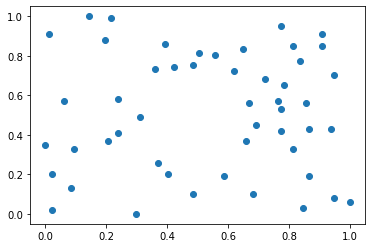

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [15]:
np.mean(X[:, 0]) # 观察第一列数据的均值

0.5360824742268041

In [16]:
np.std(X[:, 0]) # 观察第一列数据的方差

0.30573224798987375

In [17]:
np.mean(X[:, 1])

0.5146938775510205

In [18]:
np.std(X[:, 1])

0.29500322956886416

### 均值方差归一化

In [19]:
X2 = np.random.randint(0, 100, (50, 2))

In [20]:
X2 = np.array(X2, dtype = float) # 数据类型转换

In [22]:
X2[:10, :]

array([[74., 84.],
       [43., 69.],
       [97., 89.],
       [70., 81.],
       [87., 25.],
       [14., 62.],
       [ 4., 91.],
       [16., 72.],
       [19., 94.],
       [78., 36.]])

In [23]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])  # 均方差归一化
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])

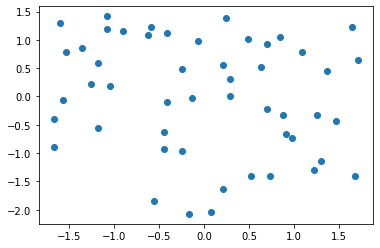

In [24]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [25]:
np.mean(X2[:, 0])

-7.993605777301127e-17

In [26]:
np.std(X2[:, 0])

1.0

In [27]:
np.mean(X2[:, 1])

-1.4654943925052067e-16

In [28]:
np.std(X2[:, 1])

0.9999999999999998